In [1]:
from math import pi
import matplotlib.pyplot as plt
from pennylane import numpy as np
import pennylane as qml
from pennylane.optimize import AdamOptimizer
import datetime
now=datetime.datetime.now

## Generate data

$f(x)=\sin(2\pi x)+0.5\sqrt{1-x^2}+x$

In [2]:
def my_objective(X):
    Y=np.sin(X)
    return Y

In [3]:
np.random.seed(1)
X=np.random.uniform(0,0.95,size=100,requires_grad=False)
# X = np.array([0.0, 0.034482758620689655, 0.06896551724137931, 0.10344827586206896, 0.13793103448275862, 0.1724137931034483, 0.20689655172413793, 0.2413793103448276, 0.27586206896551724, 0.3103448275862069, 0.3448275862068966, 0.3793103448275862, 0.41379310344827586, 0.4482758620689655, 0.4827586206896552, 0.5172413793103449, 0.5517241379310345, 0.5862068965517241, 0.6206896551724138, 0.6551724137931034, 0.6896551724137931, 0.7241379310344828, 0.7586206896551724, 0.7931034482758621, 0.8275862068965517, 0.8620689655172413, 0.896551724137931, 0.9310344827586207, 0.9655172413793104, 1.0])
# X = np.array([0.0, 0.034482758620689655, 0.06896551724137931, 0.10344827586206896, 0.13793103448275862, 0.1724137931034483, 0.20689655172413793, 0.2413793103448276, 0.27586206896551724, 0.3103448275862069, 0.3448275862068966, 0.3793103448275862, 0.41379310344827586, 0.4482758620689655, 0.4827586206896552, 0.5172413793103449, 0.5517241379310345, 0.5862068965517241, 0.6206896551724138, 0.6551724137931034, 0.6896551724137931, 0.7241379310344828, 0.7586206896551724, 0.7931034482758621, 0.8275862068965517, 0.8620689655172413, 0.896551724137931, 0.9310344827586207, 0.9655172413793104, 1.0])
# X = np.array([0.0, 034482758620689655, 0.06896551724137931, 0.10344827586206896, 0.13793103448275862, 0.1724137931034483, 0.20689655172413793, 0.2413793103448276, 0.27586206896551724, 0.3103448275862069, 0.3448275862068966, 0.3793103448275862, 0.41379310344827586, 0.4482758620689655, 0.4827586206896552, 0.5172413793103449, 0.5517241379310345, 0.5862068965517241, 0.6206896551724138, 0.6551724137931034, 0.6896551724137931, 0.7241379310344828, 0.7586206896551724, 0.7931034482758621, 0.8275862068965517, 0.8620689655172413, 0.896551724137931, 0.9310344827586207, 0.9655172413793104, 1.0])
# X = np.array([0.01, 0.04040404040404041, 0.08080808080808081, 0.12121212121212122, 0.16161616161616163, 0.20202020202020202, 0.24242424242424243, 0.2828282828282828, 0.32323232323232326, 0.36363636363636365, 0.40404040404040403, 0.4444444444444444, 0.48484848484848486, 0.5252525252525253, 0.5656565656565656, 0.6060606060606061, 0.6464646464646465, 0.6868686868686869, 0.7272727272727273, 0.7676767676767676, 0.8080808080808081, 0.8484848484848485, 0.8888888888888888, 0.9292929292929293, 0.9696969696969697, 1.0101010101010102, 1.0505050505050506, 1.0909090909090908, 1.1313131313131313, 1.1717171717171717, 1.2121212121212122, 1.2525252525252526, 1.292929292929293, 1.3333333333333333, 1.3737373737373737, 1.4141414141414141, 1.4545454545454546, 1.494949494949495, 1.5353535353535352, 1.5757575757575757, 1.6161616161616161, 1.6565656565656566, 1.696969696969697, 1.7373737373737375, 1.7777777777777777, 1.8181818181818181, 1.8585858585858586, 1.898989898989899, 1.9393939393939394, 1.97979797979798, 2.0202020202020203, 2.0606060606060606, 2.101010101010101, 2.1414141414141414, 2.1818181818181817, 2.2222222222222223, 2.2626262626262625, 2.303030303030303, 2.3434343434343434, 2.3838383838383836, 2.4242424242424243, 2.4646464646464645, 2.505050505050505, 2.5454545454545454, 2.585858585858586, 2.6262626262626263, 2.6666666666666665, 2.707070707070707, 2.7474747474747474, 2.787878787878788, 2.8282828282828283, 2.8686868686868685, 2.909090909090909, 2.9494949494949494, 2.98989898989899, 3.0303030303030303, 3.0707070707070705, 3.111111111111111, 3.1515151515151514, 3.191919191919192, 3.2323232323232323, 3.272727272727273, 3.313131313131313, 3.3535353535353534, 3.393939393939394, 3.4343434343434343, 3.474747474747475, 3.515151515151515, 3.5555555555555554, 3.595959595959596, 3.6363636363636362, 3.676767676767677, 3.717171717171717, 3.757575757575758, 3.797979797979798, 3.8383838383838382, 3.878787878787879, 3.919191919191919, 3.95959595959596, 4.0])

In [4]:
Y=my_objective(X)
# Y= np.array([0.38399110000000003, 0.3840170742666061, 0.3839828869051081, 0.38388080507535627, 0.3837084525832887, 0.3834687819772455, 0.3831695665609072, 0.3828221367988043, 0.38243947475520884, 0.38203501373261006, 0.38162167318117335, 0.38121007360346926, 0.380808830348092, 0.3804246331233159, 0.3800622459970958, 0.3797245073970667, 0.3794125382257852, 0.3791264976216649, 0.3788657684834297, 0.3786292586496905, 0.37841540822153996, 0.3782222796510877, 0.3780481110866354, 0.3778912225937809, 0.37774994280676005, 0.37762260892844646, 0.37750756673035174, 0.37740317055262523, 0.37730781807501274, 0.37722039327314166])
# Y=np.array([-1.0, -0.7580154990560892, -0.5161437433812334, -0.2766048537207341, -0.041802674575424616, 0.1858833970784918, 0.4042480529018171, 0.6114303693104511, 0.8059786334143284, 0.9869146162730239, 1.153731102545101, 1.306287083509873, 1.4447964009065875, 1.569756535500465, 1.6818505996838096, 1.7818607204031671, 1.870659268765975, 1.9491714805132159, 2.01826958097265, 2.078783646966857, 2.131508852922671, 2.177205470871178, 2.2165986052292843, 2.2503340570846433, 2.278941382471026, 2.3029040274854604, 2.3226653388639713, 2.338628563981579, 2.351156850852302, 2.3605517871991557])
# Y=np.array([383.9911, 384.01706751326924, 383.9828885247102, 383.8808125971688, 383.7084372056539, 383.4687638670096, 383.1696101373725, 382.8221351721135, 382.4394049518417, 382.03499070163184, 381.62150213890624, 381.2097329925458, 380.80859013730577, 380.4246713030564, 380.062383889052, 379.7245813646966, 379.4126024886706, 379.12660170864535, 378.8658653877571, 378.62924003544396, 378.41531030130216, 378.2223989750864, 378.0485689853088, 377.89187938330747, 377.75062031062566, 377.62313745605, 377.50784802000675, 377.4032407145614, 377.30787576341896, 377.2204251497879])


In [5]:
print(X.shape)
print(Y.shape)

(100,)
(100,)


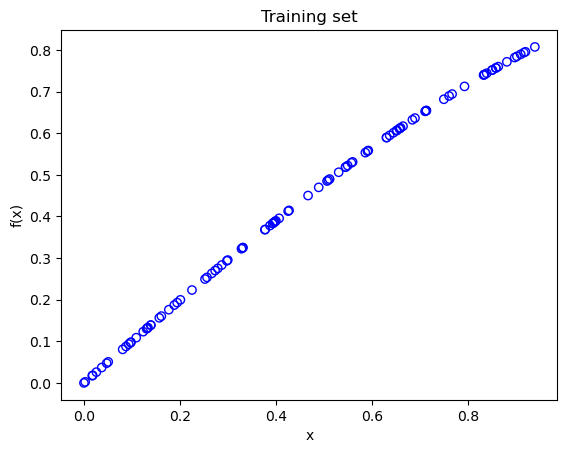

In [6]:
# plot data
plt.scatter(X,Y,facecolors='none', edgecolors='b')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Training set')
plt.savefig('xsinx_target.png')
plt.show()

## Set Device

In [7]:
num_qubits=6
dev=qml.device('default.qubit', wires=num_qubits)

## Define embedding layer

In [8]:
# define my own embedding layer
def myembedding(x0,x1,wires):
    # qml.RY(np.arcsin(x0), wires=wires[0])
    # qml.RY(2*pi*x1, wires=wires[1])
    qml.RY(x0, wires=wires[0])
    qml.RY(x1, wires=wires[1])

## Define the Hamiltonian matrix transformation layer

In [9]:
def Ham():
    obs=[]
    for j in range(num_qubits):
        obs.append(qml.PauliX(j))
        for k in range(j):
            obs.append(qml.PauliZ(j)@qml.PauliZ(k))
    coeffs=np.random.uniform(-1,1,len(obs))*10
    qml.Hamiltonian(coeffs, obs)

## Define ansatze

In [10]:
# define ansastz layer
def layer(theta):
    
    # Apply Hamiltonian matrix
    Ham()
    
    # Apply H gate
    qml.Hadamard(0)
    
    # rotations on qubits
    qml.RY(theta[0],wires=0)
    qml.RY(theta[1],wires=1)
    
    # CNOT
    qml.CNOT(wires=[0, 1])

In [11]:
@qml.qnode(dev, diff_method="backprop", interface="autograd")
def quantum_net(theta,x0,x1):
    
    # encode data
    myembedding(x0,x1,wires=range(num_qubits))
    
    # parameterized circuit layers
    for v in theta: # (for lool along with the first dimension)
        # print(v)
        # Ham()
        layer(v)
    
    qml.Hadamard(0)
    
    return qml.expval(qml.PauliZ(0))

In [12]:
num_layers=4
theta=np.random.uniform(0,2*pi,size=(num_layers,num_qubits),requires_grad=True)
print(theta.shape)
print(theta)

(4, 6)
[[2.05237045 3.31160372 5.56653838 2.24479211 5.70849471 3.91668712]
 [0.0994078  5.83982637 4.34103336 6.26636428 1.08284735 0.86164933]
 [5.85967011 4.37823763 0.41469132 4.74671435 4.73674379 5.7995342 ]
 [4.47064191 0.78081748 0.12491056 0.16468849 0.17785491 1.54698976]]


In [13]:
quantum_net(theta,0,0)

tensor(-0.53103653, requires_grad=True)

In [14]:
print(qml.draw(quantum_net)(theta,0,0))

0: ──RY(0.00)──H─────────RY(2.05)─╭●──H─────────RY(0.10)─╭●──H─────────RY(5.86)─╭●──H───────
1: ──RY(0.00)──RY(3.31)───────────╰X──RY(5.84)───────────╰X──RY(4.38)───────────╰X──RY(0.78)

───RY(4.47)─╭●──H─┤  <Z>
────────────╰X────┤     


## Add classical layer

In [15]:
# add the classical layer
def classical_quantum_net(theta,w,x0):
    
    r=quantum_net(theta,np.arcsin(x0),2*pi*x0)
    return w[0]+w[1]*r+w[2]*r**2

In [16]:
def d_arcsin(x):
    return 1/(np.sqrt(1-x**2))

In [17]:
def classical_quantum_net_prime(theta,w,t0):
    t0_0 = np.arcsin(t0)
    t0_1 = 2*pi*t0
    r1=quantum_net(theta,t0_0,t0_1)
    r1_prime_x0 = qml.grad(quantum_net,argnum=1)(theta,np.tensor(t0_0),np.tensor(t0_1)) * d_arcsin(t0)
    r1_prime_x1 = qml.grad(quantum_net,argnum=2)(theta,np.tensor(t0_0),np.tensor(t0_1)) * 2 * pi
    # print('r1_prime_x0: ',r1_prime_x0)
    # print('r1_prime_x1: ',r1_prime_x1)

    r1_prime = r1_prime_x0 + r1_prime_x1
    # print(r1_prime)
    # r2=quantum_net(theta,x)[1]
    # return w[0]+w[1]*r1+w[2]*r1**2+w[3]*r2+w[4]*r2**2
    # return qml.grad(quantum_net,argnum=1)(theta,np.tensor(t0_0),np.tensor(t0_1))
    # return r1_prime_x1
    return w[1]*r1_prime+2*w[2]*r1_prime*r1

In [18]:
def classical_quantum_net_prime_fin(theta,w,t0,dt):
    r1=classical_quantum_net(theta,w,t0+dt)
    r2=classical_quantum_net(theta,w,t0-dt)
    return (r1-r2)/(2*dt)

In [19]:
def square_loss(labels,predictions):
    loss=0
    for l,p in zip(labels,predictions):
        loss=loss+(l-p)**2
    loss=loss/len(labels)
    return loss

In [20]:
def cost(theta,w,features,labels):
    preds=[classical_quantum_net(theta,w,x) for x in features]
    return square_loss(labels,preds)

## Model training
Using the Adam optimizer, we update the weights for 200 steps (this takes some time). More steps will lead to a better fit.

In [21]:
w=np.zeros(3,requires_grad=True)
# w = np.array([ 0.63226731, -0.04043822,  0.10383093])
opt = AdamOptimizer(0.05, beta1=0.9, beta2=0.999)

In [22]:
start=now()
print(start)

2023-08-06 12:02:59.403654


In [23]:
# epochs=200
# for e in range(1,epochs+1):
    
#     (theta,w,_,_),_cost=opt.step_and_cost(cost,theta,w,X,Y)
#     if e==1 or e%10==0:
#         print(f'Epoch: {e} | Cost: {_cost} | w: {w} | theta: {theta}')

In [24]:
w = np.array([ 0.19263002, -0.58958343,  0.17366934])
theta = np.array([[0.62075502, 4.31026449, 5.56653838, 2.24479211, 5.70849471, 3.91668712],
                           [-0.50010494, 4.854299, 4.34103336, 6.26636428, 1.08284735, 0.86164933],
                           [5.1440799, 4.67536712, 0.41469132, 4.74671435, 4.73674379, 5.7995342],
                           [3.92481483, 1.80477479, 0.12491056, 0.16468849, 0.17785491, 1.54698976]])



pred_train=np.array([classical_quantum_net(theta,w,x) for x in X])

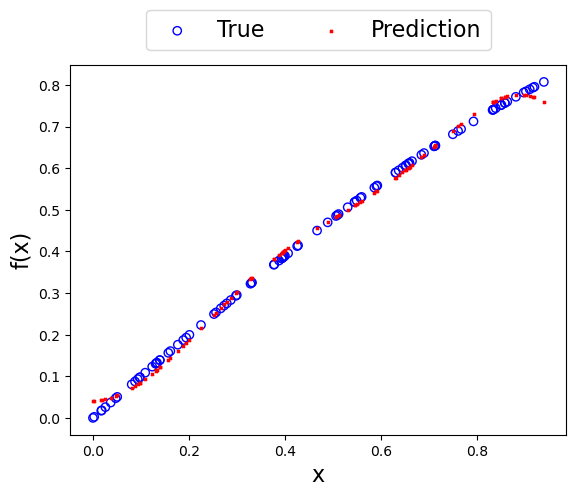

In [25]:
plt.figure()
plt.scatter(X,Y,facecolors='none', edgecolors='b', label='True')
plt.scatter(X,pred_train, color='red',marker="x",s=4,label='Prediction')
plt.xlabel('x',fontsize=16)
plt.ylabel('f(x)',fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='upper center',bbox_to_anchor=(0.5,1.18),ncol=2,fontsize=16)
plt.savefig('xsinx_train.png')
plt.show()

In [26]:

m_x = np.random.uniform(0,1,size=100,requires_grad=True)
point = m_x[20]
# point = 0.1
print('point = ',point)

# dif_grad_auto_backpro = qml.grad(quantum_net,argnum=1)(theta,point)
# print(dif_grad_auto_backpro)
# print(np.sum(dif_grad_auto_backpro))

q_cos = classical_quantum_net_prime(theta,w,point)
q_cos2 = classical_quantum_net_prime_fin(theta,w,point,0.1)

q_sin = classical_quantum_net(theta,w,point)




print('q_cos')
print(q_cos)
print(q_cos2)

print('c_cos')
print(np.cos(point))


print('q_sin')
print(q_sin)

print('c_sin')
print(np.sin(point))

point =  0.44100955232252503
q_cos
0.7668189881571442
0.8014936969832195
c_cos
0.9043211940572448
q_sin
0.4358383890548972
c_sin
0.42685264199589906


In [27]:
X=np.random.uniform(0,0.95,size=100,requires_grad=False)
Y = np.cos(X)
pred_train = [classical_quantum_net_prime_fin(theta,w,point,0.15) for point in X]
pred_train2 = [classical_quantum_net_prime(theta,w,point) for point in X]

/home/natanil/anaconda3/lib/python3.10/site-packages/pennylane/numpy/tensor.py:155: RuntimeWarning: invalid value encountered in arcsin
  res = super().__array_ufunc__(ufunc, method, *args, **kwargs)


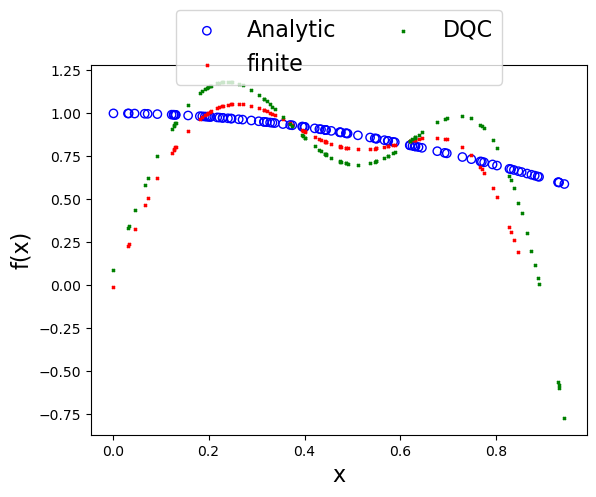

In [28]:
plt.figure()
plt.scatter(X,Y,facecolors='none', edgecolors='b', label='Analytic')
plt.scatter(X,pred_train, color='red',marker="x",s=4,label='finite')
plt.scatter(X,pred_train2, color='green',marker="x",s=4,label='DQC')
plt.xlabel('x',fontsize=16)
plt.ylabel('f(x)',fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='upper center',bbox_to_anchor=(0.5,1.18),ncol=2,fontsize=16)
plt.savefig('xsinx_train.png')
plt.show()